<a href="https://colab.research.google.com/github/vaishnavisharma6/Tensorflow-Practice/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

Given function values
$$
\{ y_i = f(x_i), i=0,1,\ldots, N-1 \}, \qquad f(x) = 2 + \sin(8 \pi x), \quad x \in [0,1]
$$
we want to find a network that gives an approximation of $f(x)$.

Assume some value of $N$, say $N=2000$ and randomly sample $x_i \in [0,1]$ and evaluate $y_i = f(x_i)$.

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense                               # important modules
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [30]:
N = 2000                                                               # sample size
train_x = np.random.random_sample(size = N)                            # training input
train_y = np.sin(8 * np.pi * train_x) + 2                              # training output

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs = {}):
    if(logs.get('accuracy')> 0.99):                                      # callback function
      print('\n Reached 99% accuracy so cancelling training.')
      self.model.stop_training = True

In [32]:
callbacks = myCallback()

In [33]:
model = Sequential()
model.add(Dense(512, input_shape = (1,), activation = 'relu'))             # defining architecture of model
model.add(Dense(1))

In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])                    #compiling model

In [36]:
history = model.fit(train_x, train_y, epochs = 2000, callbacks = [callbacks])                                     #training model

Epoch 1/2000
63/63 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 2/2000
63/63 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 3/2000
63/63 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 4/2000
63/63 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 5/2000
63/63 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 6/2000
63/63 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 7/2000
63/63 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 8/2000
63/63 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 9/2000
63/63 [==============================] - 0s 1ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 10/2000
63/63 [==============================] - 0s 1ms/st

In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


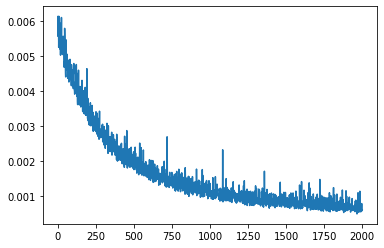

In [38]:
plt.plot(history.history['loss'])

In [39]:
test_x = np.linspace(0,1,200)                                                            #test input values
original_y = np.sin(8 * np.pi * test_x) + 2                                              #original values
test_y = model.predict(test_x)                                                           #output values by network

7/7 [==============================] - 0s 1ms/step


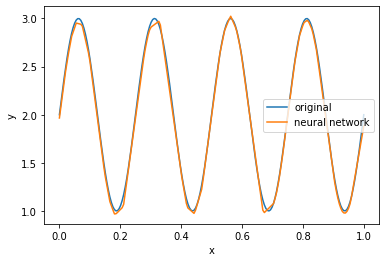

In [40]:
plt.plot(test_x, original_y, label = 'original')
plt.plot(test_x, test_y, label = 'neural network')   
plt.xlabel('x')
plt.ylabel('y')                               #plots for original values vs neural network values
plt.legend()
plt.show()